# Boston Housing Price

In [70]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# for model evaluation
from sklearn import metrics


%matplotlib inline

In [3]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [7]:
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [32]:
boston = pd.DataFrame(data= boston_dataset.data, columns= boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Add price column to dataset
> target MEDV is price for housing

In [33]:
boston['MEDV'] = boston_dataset.target

In [29]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

> **Columns Description**  
- CRIM per capita crime rate by town  
- ZN proportion of residential land zoned for lots over 25,000 sq.ft.  
- INDUS proportion of non-retail business acres per town  
- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)  
- NOX nitric oxides concentration (parts per 10 million)
- RM average number of rooms per dwelling
- AGE proportion of owner-occupied units built prior to 1940
- DIS weighted distances to five Boston employment centres
- RAD index of accessibility to radial highways
- TAX full-value property-tax rate per 10,000usd
- PTRATIO pupil-teacher ratio by town
- B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT % lower status of the population
- MEDV: Median value of owner-occupied homes in $1000s


Each record in the database describes a Boston suburb or town.

In [30]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


## Data Preprocessing

In [35]:
# Check for missing values
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [37]:
# see rows with missing values
boston[boston.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


In [38]:
# view data stastistics
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Exploratory Data Analysis
> use some visualizations to understand the relationship of the target variable with other features

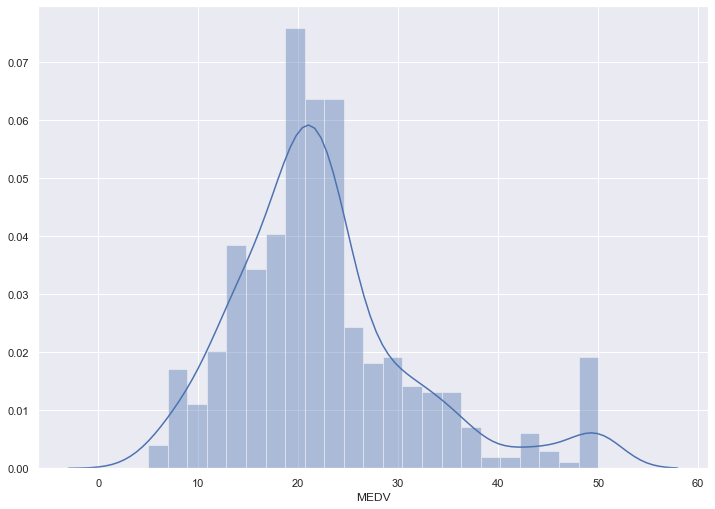

In [44]:
# plot distribution of target variable MEDV

sns.set(rc={'figure.figsize':(12,8.5)})

sns.distplot(boston['MEDV'])

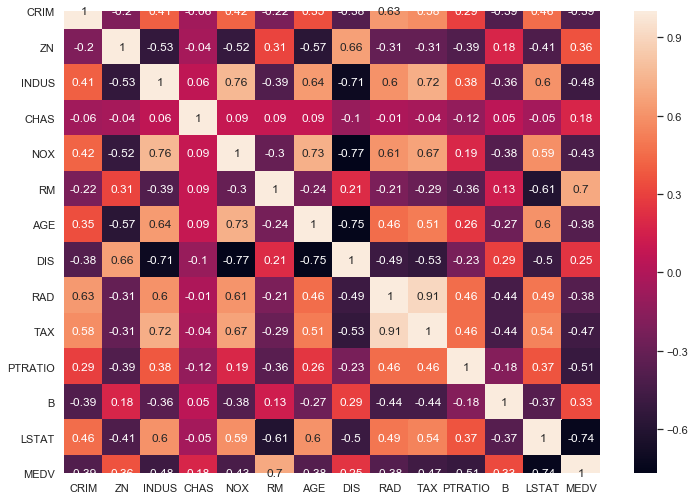

In [45]:
# create correlation matrix to measure linear relationship between variables
correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)


## Prepare Data for training the Model

In [46]:
# split target variable and independent variable
X = boston.drop(['MEDV'], axis=1)
y = boston['MEDV']

In [50]:
# split training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


## Linear Regression
> Training the model

In [51]:
# import library for linear regression

from sklearn.linear_model import LinearRegression

# create linear regressor
lm = LinearRegression()

# train the model using training set
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
lm.intercept_

36.4594883850899

In [53]:
lm.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [59]:
# convert the coefficient values to a dataframe
cdf = pd.DataFrame(lm.coef_, X.columns, ['Coefficients'])
cdf

,Coefficients
CRIM,-0.108011
ZN,0.046420
INDUS,0.020559
CHAS,2.686734
NOX,-17.766611
RM,3.809865
AGE,0.000692
DIS,-1.475567
RAD,0.306049
TAX,-0.012335


## Model Evaluation

> ### Model Evaluation for Training Data

In [63]:
y_train_pred = lm.predict(X_train)

In [73]:
# Model Evaluation

r2 = metrics.r2_score(y_train, y_train_pred)
mae =  metrics.mean_absolute_error(y_train, y_train_pred)
mse = metrics.mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)

print("R^2: ", r2)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)


R^2:  0.7540915387238473
MAE:  3.196960299011751
MSE:  19.63265865360215
RMSE:  4.430875608003699


Text(0.5, 1.0, 'Prices vs Predicted Prices')

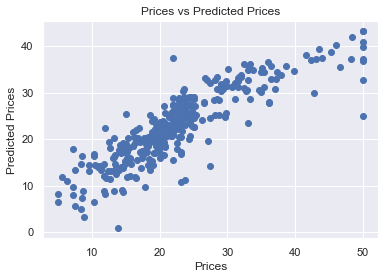

In [75]:
# Vizualize actual vs predicted price

plt.scatter(y_train, y_train_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.title("Prices vs Predicted Prices")

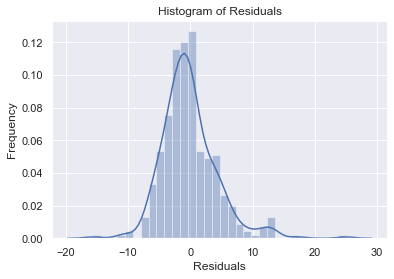

In [77]:
# Checking Normality of errors
sns.distplot(y_train - y_train_pred )
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

> ### Model Evaluation for Test Data

In [68]:
y_test_pred = lm.predict(X_test)

In [72]:
# Model Evaluation

r2 = metrics.r2_score(y_test, y_test_pred)
mae =  metrics.mean_absolute_error(y_test, y_test_pred)
mse = metrics.mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)

print("R^2: ", r2)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)

R^2:  0.7143326914185892
MAE:  3.4429778714828987
MSE:  27.163311938025092
RMSE:  5.211843429922381


Text(0.5, 1.0, 'Prices vs Predicted Prices')

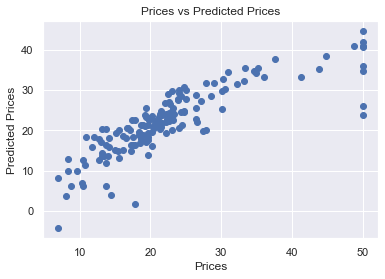

In [80]:
# Vizualize actual vs predicted price

plt.scatter(y_test, y_test_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.title("Prices vs Predicted Prices")

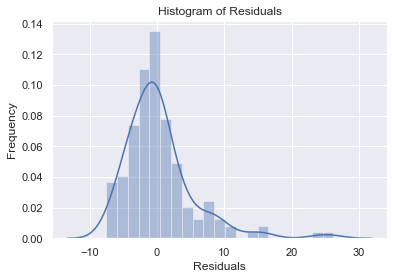

In [79]:
# Checking Normality of errors
sns.distplot(y_test - y_test_pred )
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()